1. DATA CLEANING

In [19]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/content/online_shoppers_intention.csv')

print(df.columns)

Index(['AcctPagesViewed', 'AcctPageTime', 'InfoPagesViewed', 'InfoPageTime',
       'ProductPagesViewed', 'ProductPageTime', 'AvgBounceRate', 'AvgExitRate',
       'AvgPageValue', 'ProximityToSpecialDay', 'VisitMonth', 'UserOS',
       'UserBrowser', 'UserRegion', 'SourceChannel', 'UserCategory',
       'IsWeekendVisit', 'MadePurchase'],
      dtype='object')


In [20]:
# Display the data types of each column
print(df.dtypes)

AcctPagesViewed            int64
AcctPageTime             float64
InfoPagesViewed            int64
InfoPageTime             float64
ProductPagesViewed         int64
ProductPageTime          float64
AvgBounceRate            float64
AvgExitRate              float64
AvgPageValue             float64
ProximityToSpecialDay    float64
VisitMonth                object
UserOS                     int64
UserBrowser                int64
UserRegion                 int64
SourceChannel              int64
UserCategory              object
IsWeekendVisit              bool
MadePurchase                bool
dtype: object


In [21]:
# Show unique values in 'UserCategory'
print("Unique values in 'UserCategory':")
print(df['UserCategory'].unique())

# Show one value from 'VisitMonth' (the first value)
print("\nFirst value in 'VisitMonth':")
print(df['VisitMonth'].iloc[0])

Unique values in 'UserCategory':
['Returning_Visitor' 'New_Visitor' 'Other']

First value in 'VisitMonth':
Feb


In [22]:
# Convert 'UserCategory' to one-hot encoding
user_category_one_hot = pd.get_dummies(df['UserCategory'], prefix='UserCategory')

df = pd.concat([df, user_category_one_hot], axis=1)
df = df.drop('UserCategory', axis=1)

display(df.head())

,AcctPagesViewed,AcctPageTime,InfoPagesViewed,InfoPageTime,ProductPagesViewed,ProductPageTime,AvgBounceRate,AvgExitRate,AvgPageValue,ProximityToSpecialDay,VisitMonth,UserOS,UserBrowser,UserRegion,SourceChannel,IsWeekendVisit,MadePurchase,UserCategory_New_Visitor,UserCategory_Other,UserCategory_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,False,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,False,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,False,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,False,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,True,False,False,False,True


In [23]:
from sklearn.preprocessing import OrdinalEncoder

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

encoder = OrdinalEncoder(categories=[month_order])
df['VisitMonth_Encoded'] = encoder.fit_transform(df[['VisitMonth']])
df= df.drop('VisitMonth', axis= 1)

display(df['VisitMonth_Encoded'].head())

,VisitMonth_Encoded
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [24]:
print(df.dtypes)

AcctPagesViewed                     int64
AcctPageTime                      float64
InfoPagesViewed                     int64
InfoPageTime                      float64
ProductPagesViewed                  int64
ProductPageTime                   float64
AvgBounceRate                     float64
AvgExitRate                       float64
AvgPageValue                      float64
ProximityToSpecialDay             float64
UserOS                              int64
UserBrowser                         int64
UserRegion                          int64
SourceChannel                       int64
IsWeekendVisit                       bool
MadePurchase                         bool
UserCategory_New_Visitor             bool
UserCategory_Other                   bool
UserCategory_Returning_Visitor       bool
VisitMonth_Encoded                float64
dtype: object


In [25]:
# Identify boolean columns
bool_cols = df.select_dtypes(include='bool').columns

# Convert boolean columns to integers
for col in bool_cols:
    df[col] = df[col].astype(int)
print(df.dtypes)

AcctPagesViewed                     int64
AcctPageTime                      float64
InfoPagesViewed                     int64
InfoPageTime                      float64
ProductPagesViewed                  int64
ProductPageTime                   float64
AvgBounceRate                     float64
AvgExitRate                       float64
AvgPageValue                      float64
ProximityToSpecialDay             float64
UserOS                              int64
UserBrowser                         int64
UserRegion                          int64
SourceChannel                       int64
IsWeekendVisit                      int64
MadePurchase                        int64
UserCategory_New_Visitor            int64
UserCategory_Other                  int64
UserCategory_Returning_Visitor      int64
VisitMonth_Encoded                float64
dtype: object


In [26]:
print("Number of missing vals:")
print(df.isnull().sum())

Number of missing vals:
AcctPagesViewed                   0
AcctPageTime                      0
InfoPagesViewed                   0
InfoPageTime                      0
ProductPagesViewed                0
ProductPageTime                   0
AvgBounceRate                     0
AvgExitRate                       0
AvgPageValue                      0
ProximityToSpecialDay             0
UserOS                            0
UserBrowser                       0
UserRegion                        0
SourceChannel                     0
IsWeekendVisit                    0
MadePurchase                      0
UserCategory_New_Visitor          0
UserCategory_Other                0
UserCategory_Returning_Visitor    0
VisitMonth_Encoded                0
dtype: int64


2. DATA NORMALIZATION

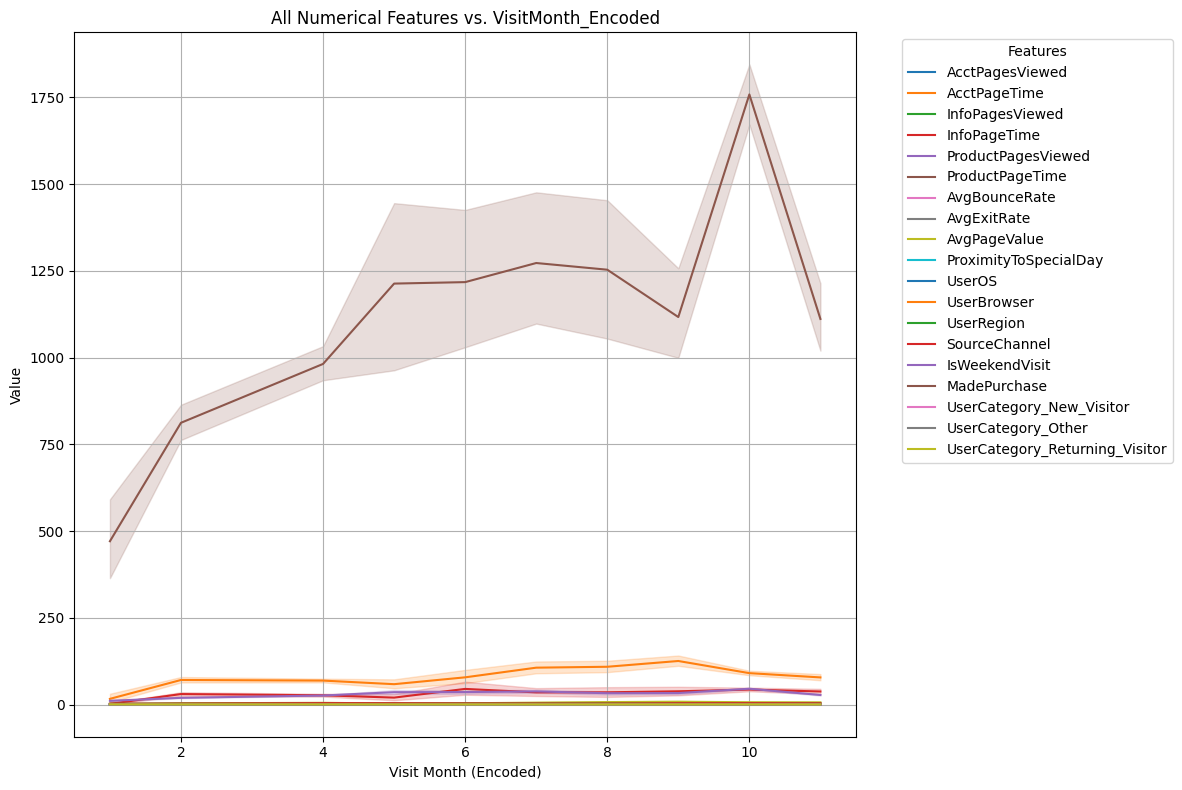

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns (excluding the encoded VisitMonth itself)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('VisitMonth_Encoded')

plt.figure(figsize=(12, 8))

# Plot each numerical column against VisitMonth_Encoded
for col in numerical_cols:
    sns.lineplot(data=df, x='VisitMonth_Encoded', y=col, label=col)

plt.title('All Numerical Features vs. VisitMonth_Encoded')
plt.xlabel('Visit Month (Encoded)')
plt.ylabel('Value')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Reshape the column before scaling
df['ProductPageTime_Scaled'] = scaler.fit_transform(df[['ProductPageTime']])

display(df[['ProductPageTime', 'ProductPageTime_Scaled']].head())

,ProductPageTime,ProductPageTime_Scaled
0,0.000000,-0.624348
1,64.000000,-0.590903
2,0.000000,-0.624348
3,2.666667,-0.622954
4,627.500000,-0.296430


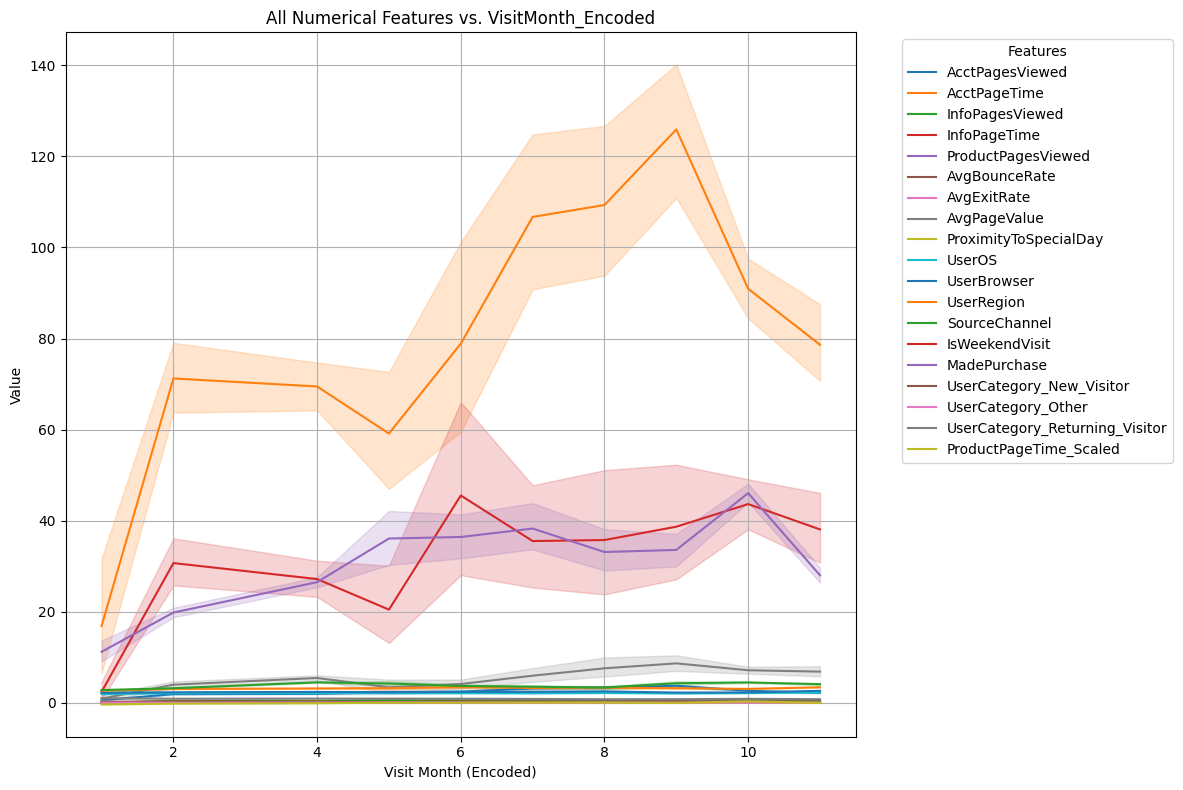

In [29]:
df= df.drop('ProductPageTime', axis= 1)

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('VisitMonth_Encoded')

plt.figure(figsize=(12, 8))

# Plot each numerical column against VisitMonth_Encoded
for col in numerical_cols:
    sns.lineplot(data=df, x='VisitMonth_Encoded', y=col, label=col)

plt.title('All Numerical Features vs. VisitMonth_Encoded')
plt.xlabel('Visit Month (Encoded)')
plt.ylabel('Value')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [30]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols_to_scale = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove the target column 'MadePurchase' and the already scaled 'ProductPageTime_Scaled'
if 'MadePurchase' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('MadePurchase')
if 'ProductPageTime_Scaled' in numerical_cols_to_scale:
    numerical_cols_to_scale.remove('ProductPageTime_Scaled')

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to each of the selected numerical columns
for col in numerical_cols_to_scale:
    # Reshape the column before scaling
    df[f'{col}_Scaled'] = scaler.fit_transform(df[[col]])
    # drop the original column after scaling
    df = df.drop(col, axis=1)


display(df.head())

,MadePurchase,ProductPageTime_Scaled,AcctPagesViewed_Scaled,AcctPageTime_Scaled,InfoPagesViewed_Scaled,InfoPageTime_Scaled,ProductPagesViewed_Scaled,AvgBounceRate_Scaled,AvgExitRate_Scaled,AvgPageValue_Scaled,ProximityToSpecialDay_Scaled,UserOS_Scaled,UserBrowser_Scaled,UserRegion_Scaled,SourceChannel_Scaled,IsWeekendVisit_Scaled,UserCategory_New_Visitor_Scaled,UserCategory_Other_Scaled,UserCategory_Returning_Visitor_Scaled,VisitMonth_Encoded_Scaled
0,0,-0.624348,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.667189,3.229316,-0.317178,-0.308821,-1.233426,-0.790293,-0.894178,-0.762629,-0.550552,-0.399087,-0.083316,0.410621,-1.665924
1,0,-0.590903,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.457683,1.171473,-0.317178,-0.308821,-0.136078,-0.207952,-0.894178,-0.514182,-0.550552,-0.399087,-0.083316,0.410621,-1.665924
2,0,-0.624348,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.667189,3.229316,-0.317178,-0.308821,2.058618,-0.790293,2.437081,-0.265735,-0.550552,-0.399087,-0.083316,0.410621,-1.665924
3,0,-0.622954,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,0.573535,1.994610,-0.317178,-0.308821,0.961270,-0.207952,-0.477771,-0.017289,-0.550552,-0.399087,-0.083316,0.410621,-1.665924
4,0,-0.296430,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.045196,0.142551,-0.317178,-0.308821,0.961270,0.374389,-0.894178,-0.017289,1.816360,-0.399087,-0.083316,0.410621,-1.665924


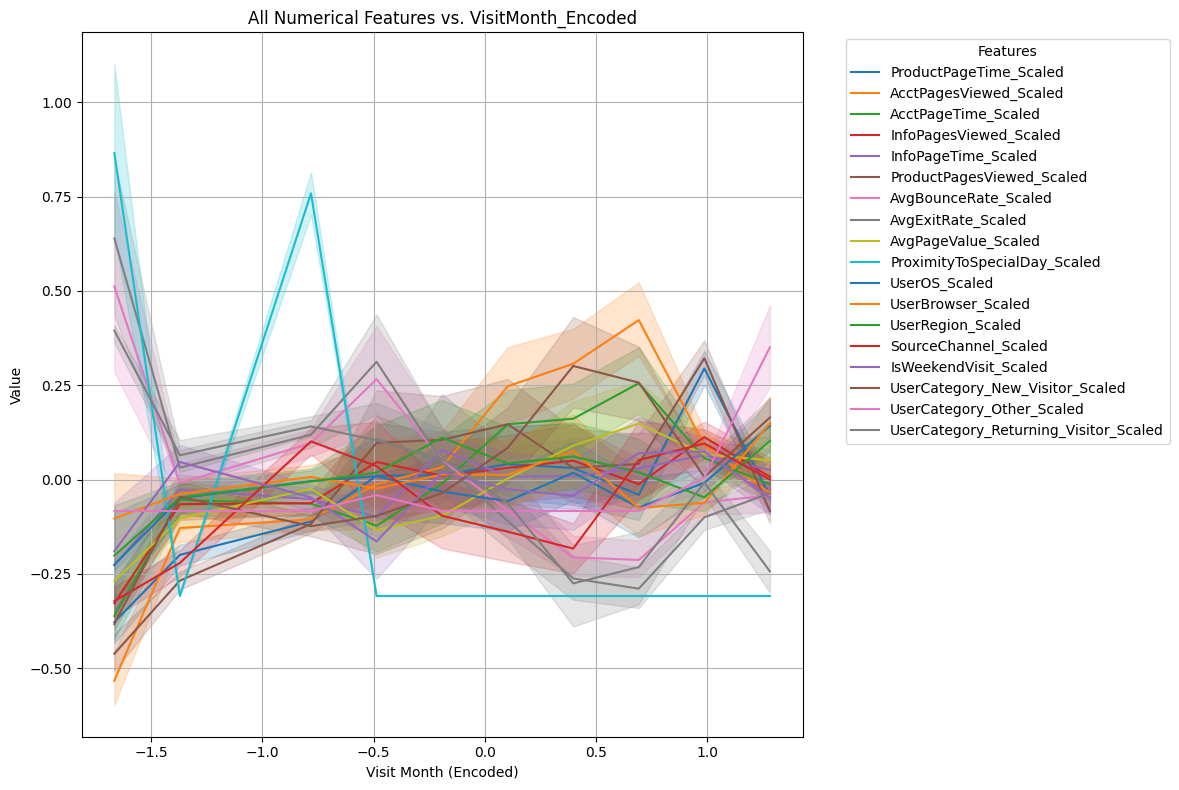

In [31]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(['VisitMonth_Encoded_Scaled', 'MadePurchase'])

plt.figure(figsize=(12, 8))

# Plot each numerical column against VisitMonth_Encoded
for col in numerical_cols:
    sns.lineplot(data=df, x='VisitMonth_Encoded_Scaled', y=col, label=col)

plt.title('All Numerical Features vs. VisitMonth_Encoded')
plt.xlabel('Visit Month (Encoded)')
plt.ylabel('Value')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

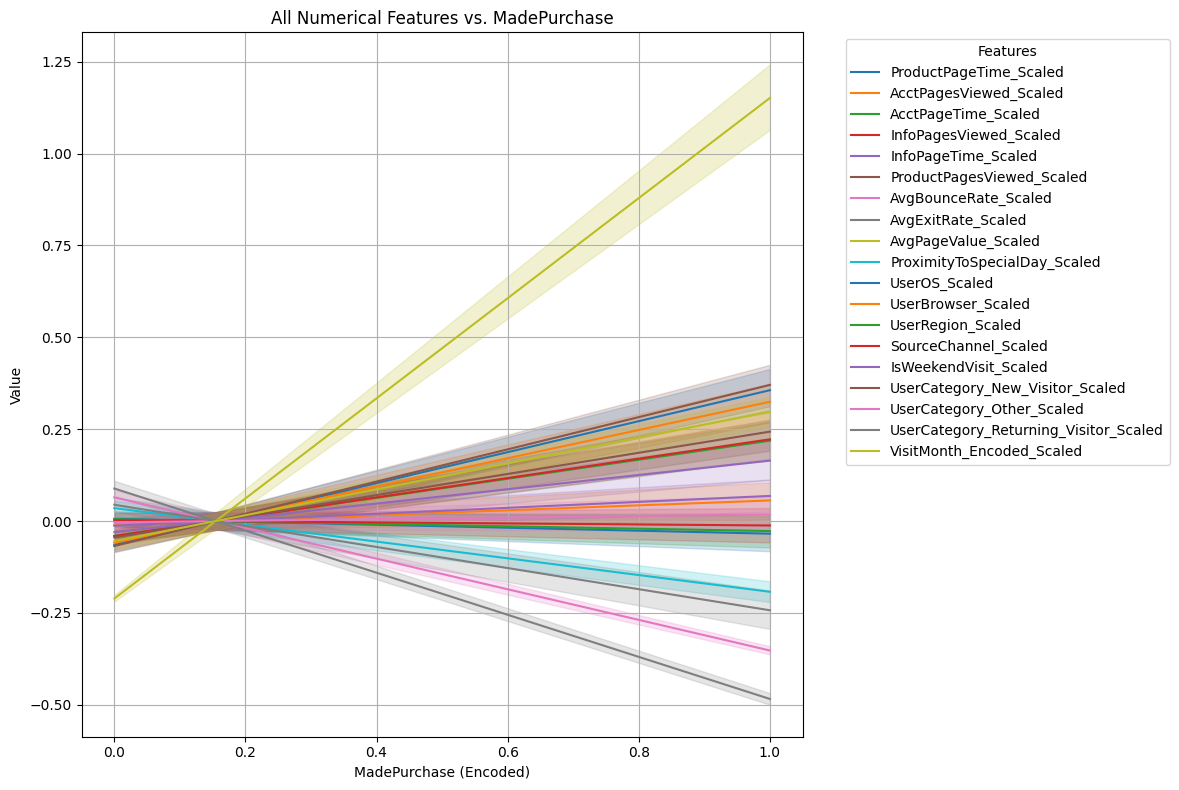

In [32]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('MadePurchase')

plt.figure(figsize=(12, 8))

# Plot each numerical column against madePurchase
for col in numerical_cols:
    sns.lineplot(data=df, x='MadePurchase', y=col, label=col)

plt.title('All Numerical Features vs. MadePurchase')
plt.xlabel('MadePurchase (Encoded)')
plt.ylabel('Value')
plt.legend(title='Features', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
# Calculate the proportion of True values in 'MadePurchase'
purchase_proportion = df['MadePurchase'].mean()

print(f"Proportion of 'True' values in 'MadePurchase': {purchase_proportion:.4f}")

Proportion of 'True' values in 'MadePurchase': 0.1547


3. CHOOSE MODELS

In [34]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('MadePurchase', axis=1)
y = df['MadePurchase']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

print("Data split into training and testing sets:")
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Data split into training and testing sets:
Training features shape: (9247, 19)
Testing features shape: (3083, 19)
Training target shape: (9247,)
Testing target shape: (3083,)


In [35]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [36]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Evaluation on Test Set:
Accuracy: 0.8770677911125527

Confusion Matrix:
 [[2543   63]
 [ 316  161]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2606
           1       0.72      0.34      0.46       477

    accuracy                           0.88      3083
   macro avg       0.80      0.66      0.69      3083
weighted avg       0.86      0.88      0.86      3083



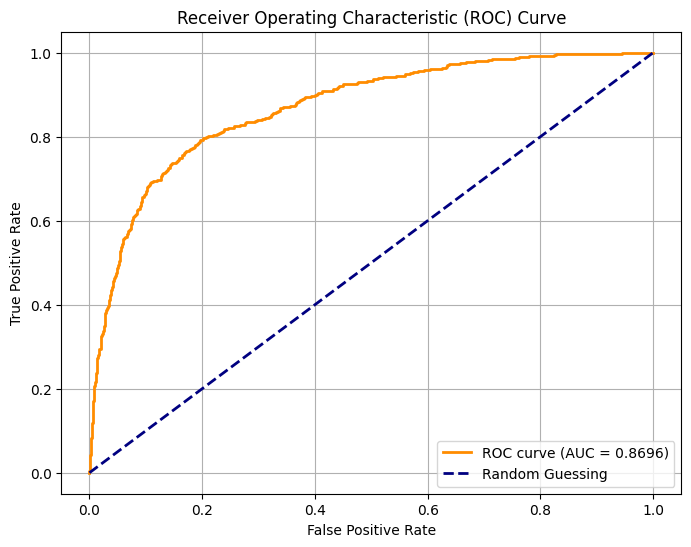

In [37]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Random Forest Classifier model trained successfully.

Random Forest Model Evaluation on Test Set:
Accuracy: 0.8975024326954265

Confusion Matrix:
 [[2516   90]
 [ 226  251]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      2606
           1       0.74      0.53      0.61       477

    accuracy                           0.90      3083
   macro avg       0.83      0.75      0.78      3083
weighted avg       0.89      0.90      0.89      3083



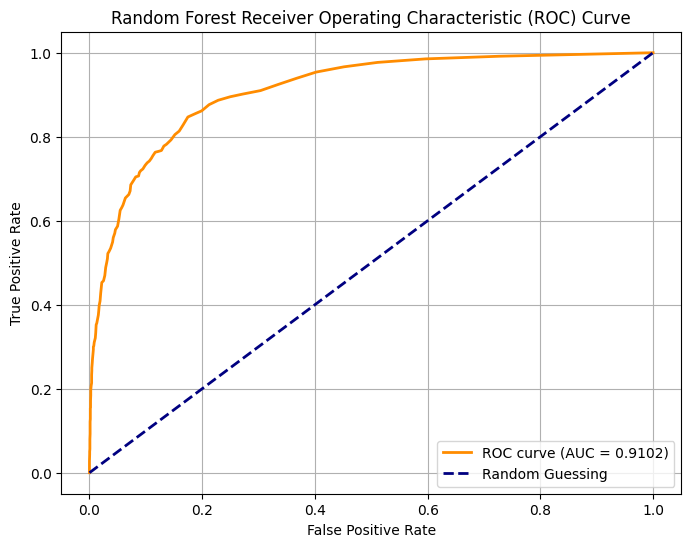

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Random Forest Classifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

print("Random Forest Classifier model trained successfully.")

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Get the predicted probabilities for the positive class
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)

# Calculate the AUC
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Optionally, plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Gradient Boosting Classifier model trained successfully.

Gradient Boosting Model Evaluation on Test Set:
Accuracy: 0.8965293545248135

Confusion Matrix:
 [[2498  108]
 [ 211  266]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      2606
           1       0.71      0.56      0.63       477

    accuracy                           0.90      3083
   macro avg       0.82      0.76      0.78      3083
weighted avg       0.89      0.90      0.89      3083



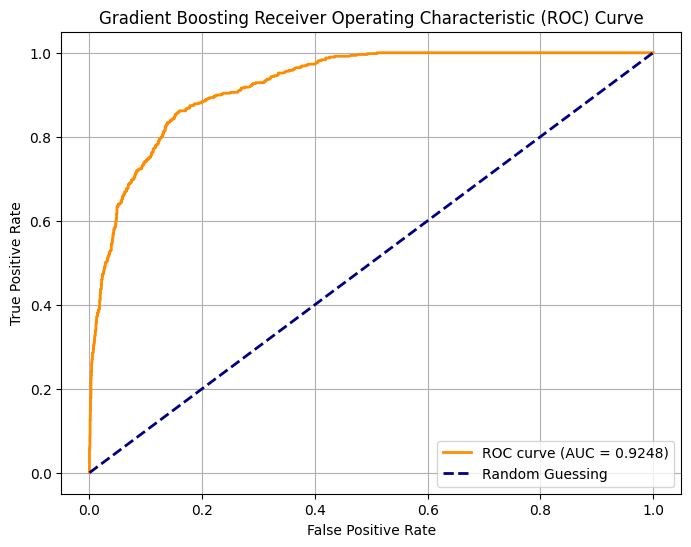

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the Gradient Boosting Classifier model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gbm_model.fit(X_train, y_train)

print("Gradient Boosting Classifier model trained successfully.")

# Make predictions on the test data
y_pred_gbm = gbm_model.predict(X_test)

# Evaluate the model
print("\nGradient Boosting Model Evaluation on Test Set:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm))

# Get the predicted probabilities for the positive class
y_prob_gbm = gbm_model.predict_proba(X_test)[:, 1]

# Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_prob_gbm)

# Calculate the AUC
roc_auc_gbm = auc(fpr_gbm, tpr_gbm)

# Optionally, plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbm, tpr_gbm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

4. CHOSEN: GRADIENT BOOSTING CLASIFIER, OVERSAMPLE MINORITY

In [40]:
!pip install imbalanced-learn

Training data after SMOTE:
Original training shape: (9247, 19), (9247,)
SMOTE resampled training shape: (15632, 19), (15632,)
SMOTE resampled target distribution:
MadePurchase
0    7816
1    7816
Name: count, dtype: int64

Gradient Boosting Classifier model trained successfully on SMOTE resampled data.

Gradient Boosting Model Evaluation on Original Test Set (SMOTE Training):
Accuracy: 0.8903665261109309

Confusion Matrix:
 [[2407  199]
 [ 139  338]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      2606
           1       0.63      0.71      0.67       477

    accuracy                           0.89      3083
   macro avg       0.79      0.82      0.80      3083
weighted avg       0.90      0.89      0.89      3083


Gradient Boosting AUC-ROC Score (SMOTE Training): 0.9255


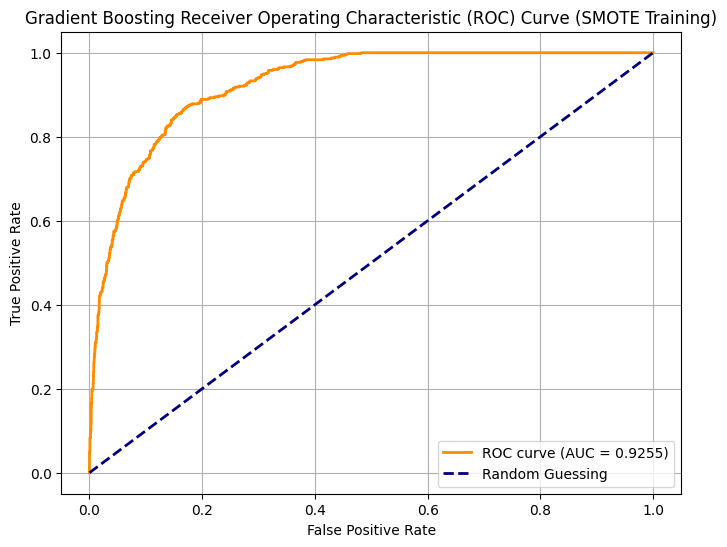

In [41]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Training data after SMOTE:")
print(f"Original training shape: {X_train.shape}, {y_train.shape}")
print(f"SMOTE resampled training shape: {X_train_smote.shape}, {y_train_smote.shape}")
print(f"SMOTE resampled target distribution:\n{y_train_smote.value_counts()}")


# Train the Gradient Boosting model on the SMOTE resampled data
gbm_model_smote = GradientBoostingClassifier(random_state=42)
gbm_model_smote.fit(X_train_smote, y_train_smote)

print("\nGradient Boosting Classifier model trained successfully on SMOTE resampled data.")

# Evaluate the model on the original test data
y_pred_gbm_smote = gbm_model_smote.predict(X_test)

print("\nGradient Boosting Model Evaluation on Original Test Set (SMOTE Training):")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm_smote))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm_smote))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm_smote))

# Calculate and display AUC-ROC
y_prob_gbm_smote = gbm_model_smote.predict_proba(X_test)[:, 1]
fpr_gbm_smote, tpr_gbm_smote, thresholds_gbm_smote = roc_curve(y_test, y_prob_gbm_smote)
roc_auc_gbm_smote = auc(fpr_gbm_smote, tpr_gbm_smote)
print(f"\nGradient Boosting AUC-ROC Score (SMOTE Training): {roc_auc_gbm_smote:.4f}")

# Optionally, plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbm_smote, tpr_gbm_smote, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbm_smote:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Receiver Operating Characteristic (ROC) Curve (SMOTE Training)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

5. TEST WEIGHTING ON MINORITY

Gradient Boosting Classifier model trained successfully with sample weights.

Gradient Boosting Model Evaluation on Original Test Set (Weighted Training):
Accuracy: 0.8631203373337658

Confusion Matrix:
 [[2270  336]
 [  86  391]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      2606
           1       0.54      0.82      0.65       477

    accuracy                           0.86      3083
   macro avg       0.75      0.85      0.78      3083
weighted avg       0.90      0.86      0.87      3083


Gradient Boosting AUC-ROC Score (Weighted Training): 0.9255


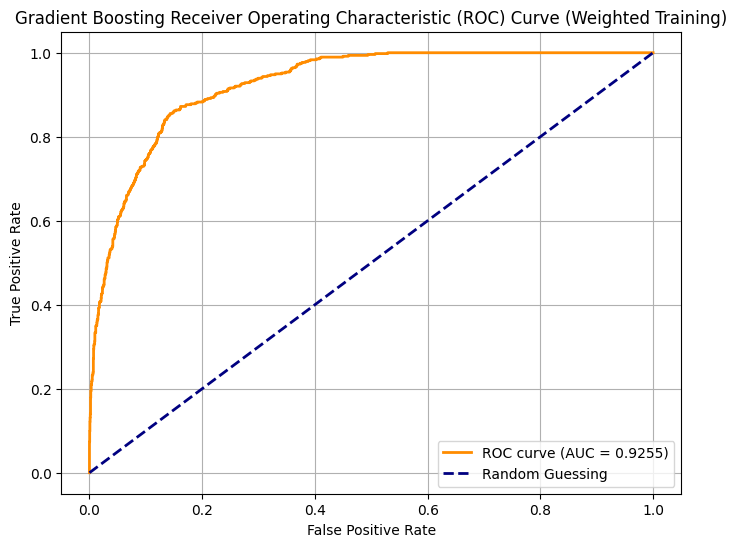

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Ensure numpy is imported

# Calculate sample weights
# Weights are inversely proportional to class frequencies
sample_weights = np.array([len(y_train) / (2 * np.bincount(y_train)[c]) for c in y_train])

# Initialize the Gradient Boosting Classifier model
gbm_model_weighted = GradientBoostingClassifier(random_state=42)

# Train the model on the training data with sample weights
gbm_model_weighted.fit(X_train, y_train, sample_weight=sample_weights)

print("Gradient Boosting Classifier model trained successfully with sample weights.")

# Evaluate the model on the original test data
y_pred_gbm_weighted = gbm_model_weighted.predict(X_test)

print("\nGradient Boosting Model Evaluation on Original Test Set (Weighted Training):")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm_weighted))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gbm_weighted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_gbm_weighted))

# Calculate and display AUC-ROC
y_prob_gbm_weighted = gbm_model_weighted.predict_proba(X_test)[:, 1]
fpr_gbm_weighted, tpr_gbm_weighted, thresholds_gbm_weighted = roc_curve(y_test, y_prob_gbm_weighted)
roc_auc_gbm_weighted = auc(fpr_gbm_weighted, tpr_gbm_weighted)
print(f"\nGradient Boosting AUC-ROC Score (Weighted Training): {roc_auc_gbm_weighted:.4f}")

# Optionally, plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gbm_weighted, tpr_gbm_weighted, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_gbm_weighted:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting Receiver Operating Characteristic (ROC) Curve (Weighted Training)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

6. CONCLUSION: GRADIENT BOOSTING WITH OVERESAMPLING THROUGH SMOTE IS BEST CHOICE

VERIFICATION NEEDED FOR HYPER PARAMETER TUNING [incapable of running currently]